### Three observable trends in the data:
1. As the number of rides increases, so too does the number of drivers; i.e. the size of the bubbles increases in the positive x direction.
1. There is decreasing variability in the average fare values as you move from rurual, to suburban, to urban. This is likely directly related to decreasing variability in the length of a ride by city type, but that's data we don't have.
1. As the number of drivers/rides increased, the average fare decreased, likely because the length of the average ride decreased as well. If Pyber lets it's drivers have some say in the fares, then there could also be an element of competition driving the fares down.

In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [21]:
#Combine the data into a single dataset
# join on city; should get a data frame with as many rows as ride_df, 2,375
complete_pyber_df = pd.merge(city_df,ride_df,on=['city'])

# Display the data table for preview
complete_pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [22]:
#for the bubble plot, need city type, total rides per city, average fares per city, and driver count per city
# need to group by city
cityGrouped = complete_pyber_df.groupby(['city'])

# make calculations on grouped data
cityType = cityGrouped['type'].max()
cityTotalRides = cityGrouped['city'].count()
cityAvgFares = cityGrouped['fare'].mean()
cityDriverCount = cityGrouped['driver_count'].max()
cityType = cityGrouped['type'].max()

bubble_df = pd.DataFrame({'City Type':cityType,
             'Total Rides':cityTotalRides,
             'Average Fare':cityAvgFares,
             'Total Drivers':cityDriverCount})

bubble_df.head()


,City Type,Total Rides,Average Fare,Total Drivers
city,,,,
Amandaburgh,Urban,18,24.641667,12
Barajasview,Urban,22,25.332273,26
Barronchester,Suburban,16,36.422500,11
Bethanyland,Suburban,18,32.956111,22
Bradshawfurt,Rural,10,40.064000,7


## Bubble Plot of Ride Sharing Data

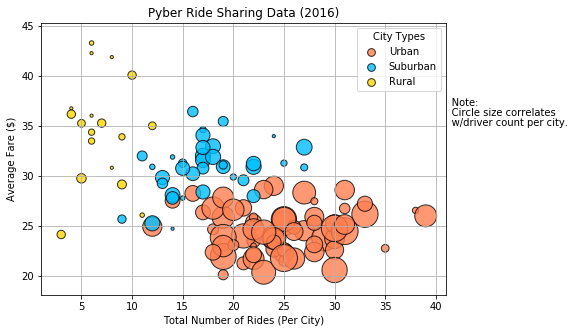

In [23]:
# Obtain the x and y coordinates for each of the three city types

# make city type dataframes from the main dataframe
urbanBubble_df = bubble_df.loc[bubble_df['City Type']=='Urban',:]
suburbanBubble_df = bubble_df.loc[bubble_df['City Type']=='Suburban',:]
ruralBubble_df = bubble_df.loc[bubble_df['City Type']=='Rural',:]

# use the urban dataframe to set the urban x, y, and size values
urbanX_axis = urbanBubble_df['Total Rides']
urbanAvgFare = urbanBubble_df['Average Fare']
urbanSize = urbanBubble_df['Total Drivers']

# use the suburban dataframe to set the suburban x, y, and size values
suburbanX_axis = suburbanBubble_df['Total Rides']
suburbanAvgFare = suburbanBubble_df['Average Fare']
suburbanSize = suburbanBubble_df['Total Drivers']

# use the rural dataframe to set the rural x, y, and size values
ruralX_axis = ruralBubble_df['Total Rides']
ruralAvgFare = ruralBubble_df['Average Fare']
ruralSize = ruralBubble_df['Total Drivers']

# Build the scatter plots for each city types
plt.figure(figsize =[9,5])
urban = plt.scatter(urbanX_axis, urbanAvgFare, marker="o", s = urbanSize*10, facecolors='coral', edgecolors="black", alpha=0.8)
suburban = plt.scatter(suburbanX_axis, suburbanAvgFare, marker="o", s = suburbanSize*10, facecolors='deepskyblue', edgecolors="black", alpha=0.8)
rural = plt.scatter(ruralX_axis, ruralAvgFare, marker="o", s = ruralSize*10, facecolors='gold', edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# calculate axis limits
minx = min(min(urbanX_axis),min(suburbanX_axis),min(ruralX_axis))
maxx = max(max(urbanX_axis),max(suburbanX_axis),max(ruralX_axis))

miny = min(min(urbanAvgFare),min(suburbanAvgFare),min(ruralAvgFare))
maxy = max(max(urbanAvgFare),max(suburbanAvgFare),max(ruralAvgFare))

# set limits and add cushion.
plt.xlim(minx-2,maxx+2)
plt.ylim(miny-2,maxy+2)

# Create a legend
lgnd = plt.legend((urban,suburban,rural),('Urban','Suburban','Rural'),title='City Types',loc='best')

# make the legend bubbles the same size
for handle in lgnd.legendHandles:
    handle.set_sizes([60])

# Incorporate a text label regarding circle size
plt.subplots_adjust(right = 0.75)
plt.text(40,37,'     Note:')
plt.text(40,36,'     Circle size correlates')
plt.text(40,35,'     w/driver count per city.')

# Save Figure
plt.savefig('RideSharing-Bubble.png',dpi=600)


In [24]:
# Show plot
plt.show()

## Total Fares by City Type

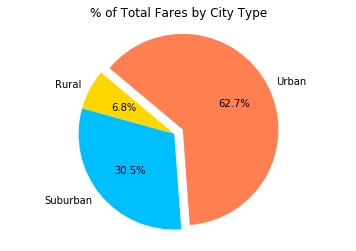

In [25]:
# Calculate Type Percents
typeGrouped = complete_pyber_df.groupby(['type'])

# Build Pie Chart
types = typeGrouped['fare'].sum().index
share = typeGrouped['fare'].sum()
colors = ['gold','deepskyblue','coral']
explode = (0,0,0.1)

plt.pie(share, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis('equal')
plt.title('% of Total Fares by City Type')

# # Save Figure
plt.savefig('Fares-by-CityType-Pie.png',dpi=600)

In [26]:
# Show Figure
plt.show()

## Total Rides by City Type

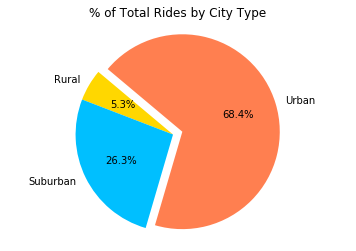

In [27]:
# Calculate Ride Percents

# Build Pie Chart
types = typeGrouped['ride_id'].count().index
share = typeGrouped['ride_id'].count()
colors = ['gold','deepskyblue','coral']
explode = (0,0,0.1)

plt.pie(share, explode=explode, labels=types, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Rides-by-CityType-Pie.png',dpi=600)


In [28]:
# Show Figure
plt.show()

## Total Drivers by City Type

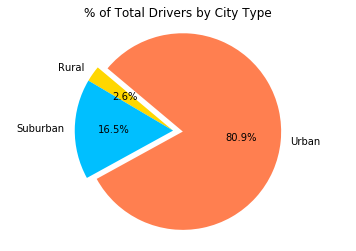

In [29]:
# Calculate Driver Percents
ctypeGrouped = city_df.groupby(['type'])
# Build Pie Charts
types = ctypeGrouped['driver_count'].sum().index
share = ctypeGrouped['driver_count'].sum()
colors = ['gold','deepskyblue','coral']
explode = (0,0,0.1)

plt.pie(share, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Drivers-by-CityType-Pie.png',dpi=600)

In [30]:
# Show Figure
plt.show()